## TensorFlow 2.x MNIST Classification with DNN (Only Dense Layers)

In [1]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
print("Eager execution enabled:", tf.executing_eagerly())


Eager execution enabled: True


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2, l1
import numpy as np

In [3]:
# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)) / 255.0 
test_images = test_images.reshape((10000, 28*28)) / 255.0

# **L1 Regulation**

In [9]:
model1 = models.Sequential([
    layers.Dense(512, activation='relu',kernel_regularizer=l1(0.001), input_shape=(28*28,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu',kernel_regularizer=l1(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu',kernel_regularizer=l1(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

# **L2 Regulation**

In [4]:
model2 = models.Sequential([
    layers.Dense(512, activation='relu',kernel_regularizer=l2(0.01), input_shape=(28*28,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu',kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu',kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

D:\Jbook3\env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from tensorflow.keras.optimizers import AdamW

optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5)

model1.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [5]:
from tensorflow.keras.optimizers import AdamW
optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5)
model2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
]


history = model1.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_data=(test_images, test_labels),
    callbacks=callbacks
)



Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8414 - loss: 11.2553 - val_accuracy: 0.7043 - val_loss: 2.3685 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9084 - loss: 1.6223 - val_accuracy: 0.9268 - val_loss: 1.1766 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9160 - loss: 1.1553 - val_accuracy: 0.9047 - val_loss: 1.0807 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9214 - loss: 1.0192 - val_accuracy: 0.9509 - val_loss: 0.8335 - learning_rate: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9274 - loss: 0.8941 - val_accuracy: 0.9440 - val_loss: 0.7835 - learning_rate: 0.0010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9282 - loss: 0.8186 - val_accuracy: 0.9407 - val_loss: 0.7520 - learning_rate: 0.0010
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9309 - loss: 

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
]

history1 = model2.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_data=(test_images, test_labels),
    callbacks=callbacks
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8467 - loss: 5.7009 - val_accuracy: 0.9127 - val_loss: 0.7797 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9310 - loss: 0.6522 - val_accuracy: 0.9414 - val_loss: 0.5210 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9337 - loss: 0.5358 - val_accuracy: 0.9221 - val_loss: 0.5602 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9322 - loss: 0.5165 - val_accuracy: 0.9392 - val_loss: 0.4775 - learning_rate: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9341 - loss: 0.4937 - val_accuracy: 0.9340 - val_loss: 0.4741 - learning_rate: 0.0010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9330 - loss: 0.4795 - val_accuracy: 0.9435 - val_loss: 0.4485 - learning_rate: 0.0010
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9364 - loss: 

# **Model1 Accuracy**

In [12]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9677 - loss: 0.2886

Test accuracy: 0.9735


# **Model2 Accuracy**

In [8]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.1296

Test accuracy: 0.9820


# **Model1** 

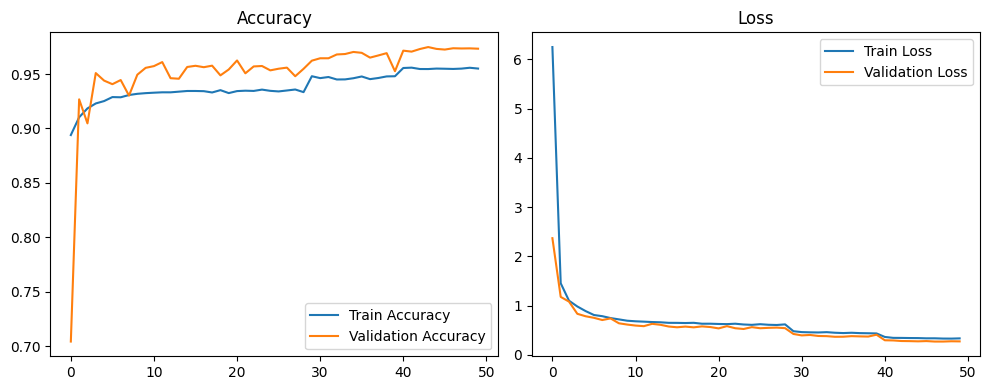

In [13]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

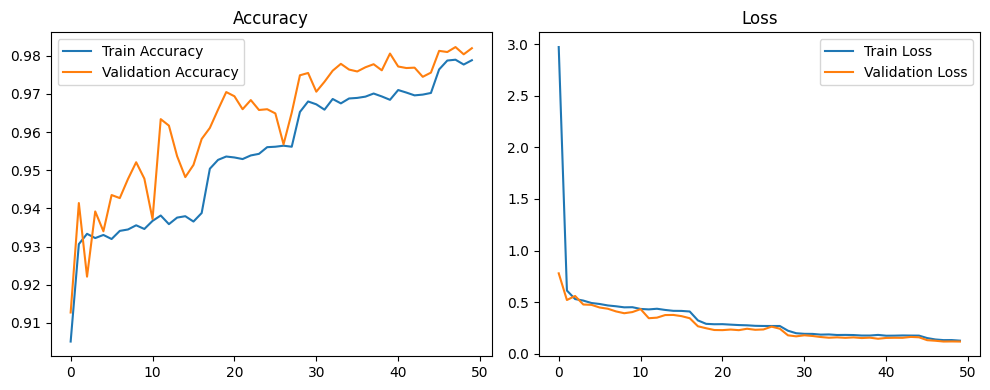

In [7]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# **L2 Regularization Model:**
Training and validation losses decrease smoothly.

Model likely had more consistent learning across layers.

Better generalization on the test set (higher accuracy).

Weight decay keeps the model’s capacity but penalizes extreme weight values.

# **L1 Regularization Model:**

Slightly lower accuracy (still very good).

Tends to create sparse models by setting some weights to zero.

Could have helped prune unnecessary neurons, but at the cost of some performance.

L1 is good when feature selection is important or when the input data is very high-dimensional and sparse.